In [10]:
import schemdraw
import schemdraw.elements as elm

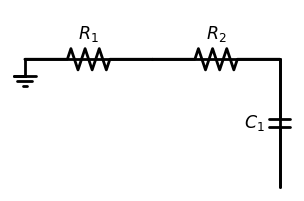

In [9]:
d = schemdraw.Drawing()
R1 = d.add(e.RES, label='$R_1$')
R2 = d.add(e.RES, d='right', label='$R_2$')
C1 = d.add(e.CAP, d='down', label='$C_1$')
#C2 = d.add(e.CAP, d='down', label='$C_2$')
#R2 = d.add(e.RES, d='right', label='$R_2$')
d.add(elm.LINE, to=C1.start)
d.add(elm.LINE, to=C2.start)
d.add(elm.LINE, to=R1.start)
d.add(elm.GND)
d.draw()

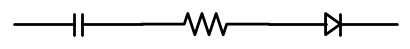

In [12]:
with schemdraw.Drawing() as d:
    d += elm.Capacitor()
    d += elm.Resistor()
    d += elm.Diode()

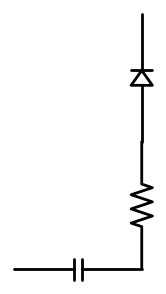

In [11]:
with schemdraw.Drawing() as d:
    d += elm.Capacitor()
    d += elm.Resistor().up()
    d += elm.Diode()

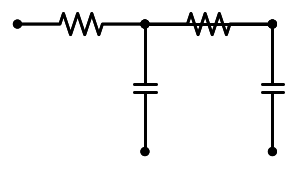

In [38]:
with schemdraw.Drawing() as d:
    
    
    with schemdraw.Drawing() as d:
    R = d.add(elm.Resistor())
    C = d.add(elm.Capacitor().up())
    Q = d.add(elm.Diode().to(R.start))
    
    d += elm.Dot()
    d += elm.Resistor()
    d += elm.Dot()
    d.push()

    d += elm.Capacitor().down()
    d += elm.Dot()
    d.pop()
    d.push()

    d += elm.Dot()
    d += elm.Resistor()
    d += elm.Dot()

    d += elm.Capacitor().down()
    d += elm.Dot()
    d.pop()
    d.push()

    d.pop()
    d += elm.Line()
    d += elm.Dot()




    # d.pop()
    # d += elm.Capacitor().down()
    # d += elm.Ground(lead=True)
    
    # d.pop()
    # d += elm.Line()

    d.draw()

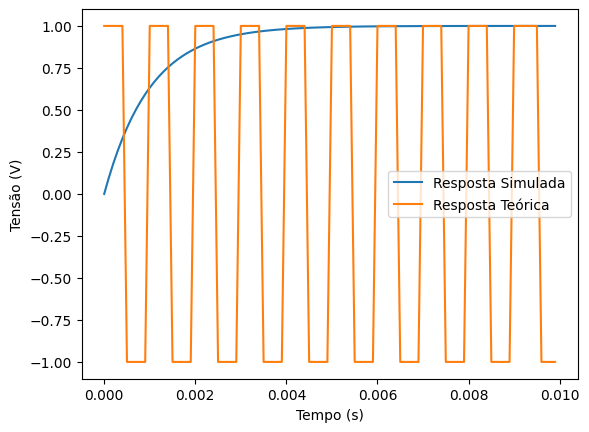

In [10]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import control

# Definir os valores dos componentes do circuito e a função de entrada
R = 1000
C = 1e-6
Vin = signal.square(2 * np.pi * 1000 * np.arange(0, 0.01, 0.0001))

# Calcular a função transferência do sistema
s = control.TransferFunction.s
G = 1 / (R * C * s + 1)

# Criar o objeto TransferFunction usando a função transferência calculada
sys = control.TransferFunction(G.num, G.den)

# Simular o sistema e obter a resposta
t, y = control.step_response(sys, T=np.arange(0, 0.01, 0.0001))

# Plotar a resposta simulada e comparar com a resposta teórica
plt.plot(t, y)
plt.plot(t, Vin)
plt.xlabel('Tempo (s)')
plt.ylabel('Tensão (V)')
plt.legend(['Resposta Simulada', 'Resposta Teórica'])
plt.show()

$$
E(s) = \frac{1}{1+Gc(s)G1(s)H(s)} * R(s) - \frac{G2(s)H(s)}{1+Gc(s)G1(s)H(s)}*P(s)
$$

$$C(s) = \frac{1}{s(T+1/T)} = \frac{1}{T} * \frac{1}{s} - \frac{1}{T} * \frac{1}{Ts+1}$$

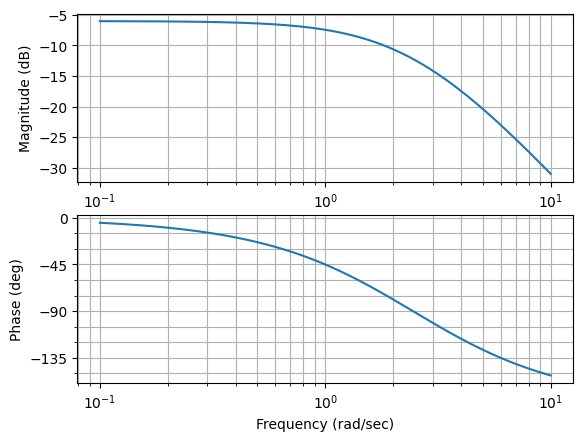

In [1]:
import control
import matplotlib.pyplot as plt

# Criando os blocos do diagrama
G1 = control.TransferFunction(1, [1, 2])
G2 = control.TransferFunction(3, [1, 3])

# Criando o diagrama de blocos
sys = control.series(G1, G2)

# Plotando o diagrama de blocos
control.bode_plot(sys, dB=True)
plt.show()

In [2]:
import control
import matplotlib.pyplot as plt

# Definindo a função de transferência
num = [10]
den = [1, 10, 0]
sys = control.TransferFunction(num, den)

# Plotando o diagrama de blocos
control.matlab.bode(sys, dB=True)
plt.show()

# Plotando o diagrama de blocos
control.matlab.pzmap(sys)
plt.show()

# Plotando o diagrama de blocos
control.matlab.rlocus(sys)
plt.show()

# Plotando o diagrama de blocos
control.matlab.step(sys)
plt.show()

# Plotando o diagrama de blocos
control.matlab.impulse(sys)
plt.show()


\begin{equation}
\tag{1}
\end{equation}


AttributeError: module 'control' has no attribute 'matlab'

O tempo de atraso é o tempo necessário para que a resposta atinja uma porcentagem específica de seu valor final. Geralmente, o tempo de atraso é definido como o tempo necessário para que a resposta atinja 50% de seu valor final.

Para determinar o tempo de atraso, precisamos encontrar o tempo em que a resposta atinge 50% do valor final. Sabemos que a resposta em regime permanente é dada por:

$c(\infty) = 1$

Portanto, o tempo de atraso é dado por:

$c(t_d) = 0.5$

Substituindo a equação para $c(t)$, temos:

$1 - e^{-\zeta\omega_n t_d} \frac{1}{\sqrt{1-\zeta^2}}\sin(\omega_d t_d + \tan^{-1}(\frac{\sqrt{1-\zeta^2}}{\zeta})) = 0.5$

Simplificando, temos:

$e^{-\zeta\omega_n t_d} \frac{1}{\sqrt{1-\zeta^2}}\sin(\omega_d t_d + \tan^{-1}(\frac{\sqrt{1-\zeta^2}}{\zeta})) = 0.5$

Tomando o logaritmo natural em ambos os lados, temos:

$-\zeta\omega_n t_d + \ln{\frac{1}{\sqrt{1-\zeta^2}}\sin(\omega_d t_d + \tan^{-1}(\frac{\sqrt{1-\zeta^2}}{\zeta}))} = \ln{0.5}$

Isolando $t_d$, temos:

$t_d = \frac{1}{\omega_d}\left[\arctan{\left(\frac{\sqrt{1-\zeta^2}}{\zeta}\right)} + \arccos{\left(\frac{\ln{2}}{\sqrt{1-\zeta^2}}\right)}\right]$

Portanto, essa é a expressão para o tempo de atraso em um sistema de segunda ordem.

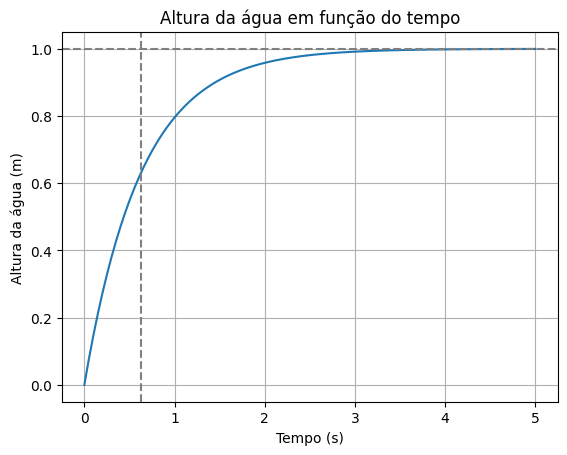

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo a função h(t)
A = 1
T = 0.63
h = lambda t: A - A * np.exp(-t/T)

# Criando o gráfico
t = np.linspace(0, 5, 100) # Definindo o intervalo de tempo de 0 a 60 segundos
plt.plot(t, h(t))

# Configurando o gráfico
plt.xlabel('Tempo (s)')
plt.ylabel('Altura da água (m)')
plt.title('Altura da água em função do tempo')
plt.grid(True) # Adiciona uma grade no fundo do gráfico
plt.axhline(y=A, linestyle='--', color='gray') # Adiciona uma linha horizontal na altura A
plt.axvline(x=T, linestyle='--', color='gray') # Adiciona uma linha vertical no tempo T

plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

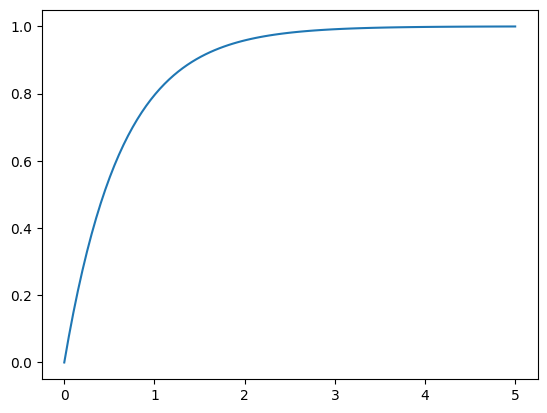

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo a função h(t)
A = 1
T = 0.63
h = lambda t: A - A * np.exp(-t/T)

# Criando o gráfico
t = np.linspace(0, 5, 100) # Definindo o intervalo de tempo de 0 a 60 segundos
plt.plot(t, h(t))

# Encontrando o valor de t para h(t) = 0,63
idx = np.where(np.isclose(h(t), T, atol=0.01))[0][0]
t_063 = t[idx]
h_063 = h(t_063)

# Plotando o ponto correspondente a h(t) = 0,63
plt.plot(t_063, h_063, 'ro', label='h = 0.63')

# Configurando o gráfico
plt.xlabel('Tempo (s)')
plt.ylabel('Altura da água (m)')
plt.title('Altura da água em função do tempo')
plt.grid(True) # Adiciona uma grade no fundo do gráfico
plt.axhline(y=A, linestyle='--', color='gray') # Adiciona uma linha horizontal na altura A
plt.axvline(x=T, linestyle='--', color='gray') # Adiciona uma linha vertical no tempo T

plt.legend()
plt.show()
